## Module 2: Individual Project Logistic Regression

#### Class ALY6040.80439: Data Mining
#### Prof. Justin Grosz

### Team X members:  
####Hang Wu

#### April 24, 2022

In [11]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
from zipfile import ZipFile
import io
#import urllib2
from urllib.request import urlopen
import numpy as np #used for number manipiulation
import matplotlib.pyplot as plt #used for plotting
import math
import seaborn as sns
#imports
#!pip3 install scikit-learn
#!pip3 install lightgbm
#!pip3 install xgboost
#!pip install --upgrade matplotlib
#!pip install --upgrade pandas
#!pip install --upgrade numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
##Restart session after each time the update occured, becasue Google Collab resets the udpate every time
#import os
#os.kill(os.getpid(), 9)


In [56]:
##Data extraction##

#r = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/KickS-additional.zip").read()
#print(io.BytesIO(r))
#file = ZipFile(io.BytesIO(r)) #use io.ByteIO instead of io.StringIO to get the data into the correct unicode
import urllib
import urllib.request; 
#opener = urllib.request.urlopen()
#opener = urllib.request.URLopener()
url = "https://60802.s3.amazonaws.com/KickstarterData_Facts.csv"#upload to s3 because localhost kernel has issues, force to use online collab that required
#me to read file
ks_csv=urllib.request.urlopen(url)
#ks_csv = opener.open(url)

#print(file)
#file.extractall() #extract the folder to the current path
#print(file.namelist()) # list all of the files in the zip
#KickS_csv = file.open("KickS-additional/KickS-additional-full.csv") #open the file from the zip
KickS = pd.read_csv(ks_csv,sep = ',') # read_csv returns the dataframe type
display(KickS.head(3))
df=KickS
df_backup=df
#print(KickS)


,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,2019-07-01,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,2019-07-01,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,2019-07-01,female,100,silver,6,vanilla,yes,<50K,yes,6,1


Shape of Dataframe

In [13]:
df.shape

(10000, 12)

Data type of features

In [14]:
df.dtypes

Donate ID                                int64
Donate Date                             object
Gender                                  object
Deposit Amount                           int64
Preferred Color of Device               object
Ice Cream Products Consumed Per Week     int64
Favorite Flavor Of Ice Cream            object
Donated To Kick Starter Before          object
Household Income                        object
Do you own a Keurig                     object
How many desserts do you eat a week      int64
Purchased                                int64
dtype: object

STATISTICAL SUMMARY OF NUMERICAL COLUMNS

In [15]:
round(df.describe(),2)

,Donate ID,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week,Purchased
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,139.52,4.96,6.69,0.65
std,2886.90,80.48,3.17,2.46,0.48
min,1.00,0.00,0.00,0.00,0.00
25%,2500.75,100.00,2.00,5.00,0.00
50%,5000.50,100.00,5.00,7.00,1.00
75%,7500.25,119.00,8.00,9.00,1.00
max,10000.00,400.00,10.00,10.00,1.00


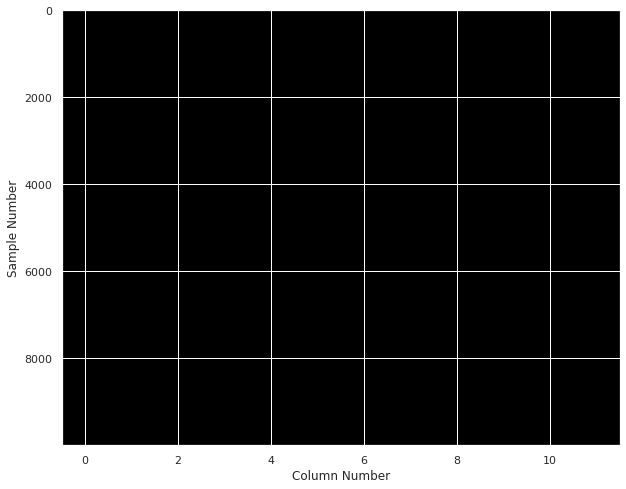

In [57]:
df_X=df
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

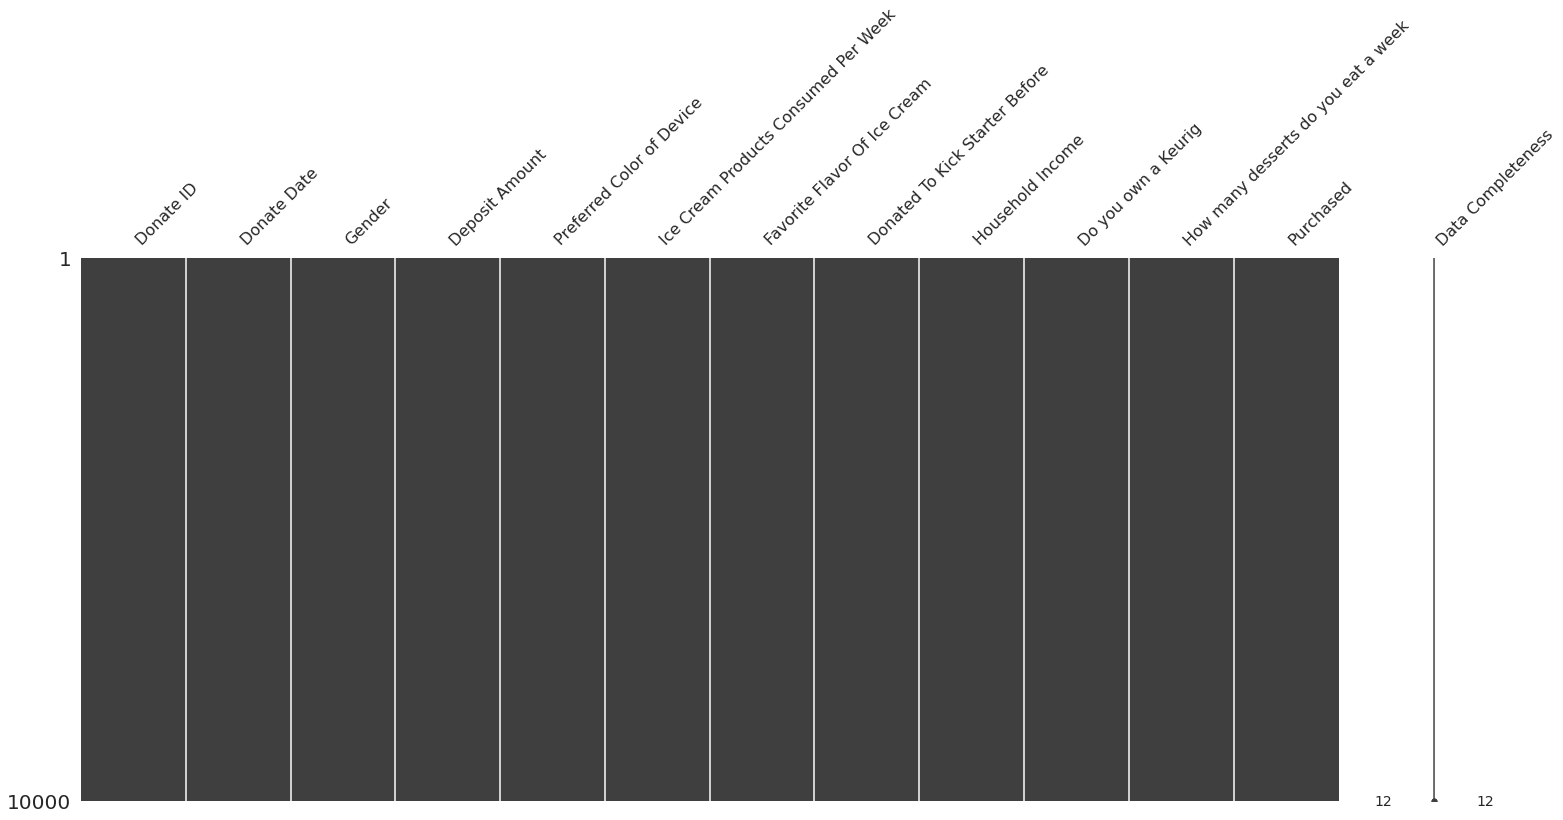

In [58]:
import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

In [16]:
#print(KickS.columns)

##Data Clean: data transformation, convert tdfpes##
#Conversion: convert it to a dictionardf
KickSd = KickS.to_dict()
#print(KickSd["age"])
#check if the data needs transformation
# skewness along the index axis
skewness = KickS.skew(axis=0, skipna = True)
#tdfpe(skewness) #float, let's change to dataframe
skewness = pd.DataFrame(skewness)
skewness.columns.name = "skewness"
display(skewness) #use skewness to get the descriptive stat, and renormalize the data
###---------------display the 
df = KickS




skewness,0
Donate ID,0.000000
Deposit Amount,1.868525
Ice Cream Products Consumed Per Week,0.022609
How many desserts do you eat a week,-0.440511
Purchased,-0.635064


In [17]:
#Data Clenaing: filter data and 
yesOwn = (df["Do you own a Keurig"]=='yes') #subsample of currentldf own a keurig
yesDonated = (df["Donated To Kick Starter Before"]=='yes') #subsample of donated to kickstarter before
yesOwnDF = pd.DataFrame(yesOwn)
yesDonatedDF = pd.DataFrame(yesDonated)


#display(dfesPaidDF)
#display(dfesPaidBothDF)
a = display(df.loc[yesOwn])#4640 data with output dfes

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,2019-07-01,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,2019-07-01,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,2019-07-01,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,4,2019-07-01,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,5,2019-07-01,male,100,white,1,vanilla,yes,<50K,yes,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,2019-07-09,male,100,white,0,specialty,yes,Not Reported,yes,4,1
9994,9995,2019-07-09,male,100,red,4,chocolate,no,Not Reported,yes,6,1
9996,9997,2019-07-09,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,9998,2019-07-09,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0


In [18]:
# kurtosis along the index axis
kurtosis = KickS.kurtosis(axis=0, skipna = True)
#tdfpe(skewness) #float, let's change to dataframe
kurtosis = pd.DataFrame(kurtosis)
print(kurtosis.columns.name)
kurtosis.columns.name = "kurtosis"

display(kurtosis)

None


kurtosis,0
Donate ID,-1.200000
Deposit Amount,2.235980
Ice Cream Products Consumed Per Week,-1.215305
How many desserts do you eat a week,-0.704772
Purchased,-1.597013


## Checking for missing values

In [19]:

df.isnull().sum()


Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

##Numerical features data distribution

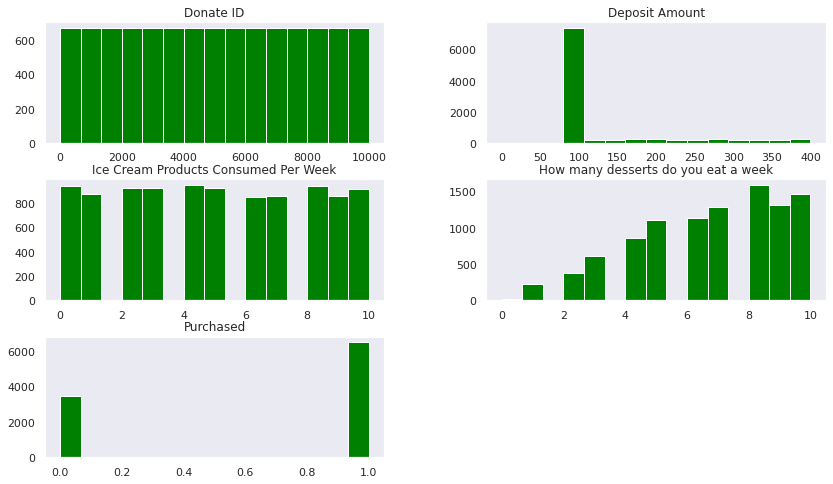

In [20]:
sns.set(rc={'figure.figsize':(12,10)})
df.hist(figsize=(14,8),
               bins=15,
               grid=False,
               color='green')
plt.show()

##Features that are Numeric Columns Only

In [21]:
numericalColumn = df.select_dtypes([np.number]).columns
print(numericalColumn.size)
print("\nNumerical columns: \n", numericalColumn)

5

Numerical columns: 
 Index(['Donate ID', 'Deposit Amount', 'Ice Cream Products Consumed Per Week',
       'How many desserts do you eat a week', 'Purchased'],
      dtype='object')


## Boxplot of numerical features to find out outliers

0
1
2
3


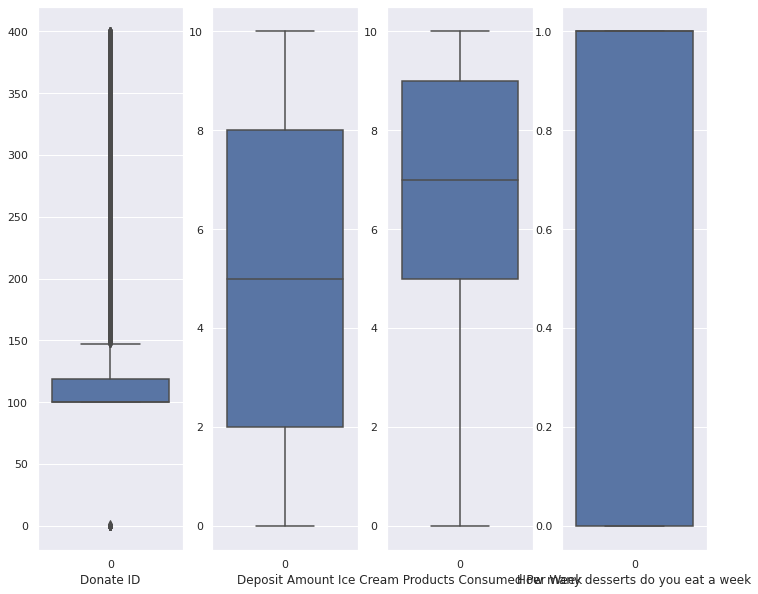

In [22]:
fig, axs = plt.subplots(ncols = 4, nrows = 1)
#sns.set(rc={'figure.figsize':(20,25)})

#plot1 = sns.boxplot(data = df['Donate ID'], ax=axs[0])
plot2 = sns.boxplot(data = df['Deposit Amount'], ax=axs[0])
plot3 = sns.boxplot(data = df['Ice Cream Products Consumed Per Week'], ax=axs[1])
plot4 = sns.boxplot(data = df['How many desserts do you eat a week'], ax=axs[2])
plot5 = sns.boxplot(data = df['Purchased'], ax=axs[3])
#plot6 = sns.boxplot(data = df['emp.var.rate'], ax=axs[1][0])
#plot7 = sns.boxplot(data = df['cons.price.idx'], ax=axs[1][1])
#plot8 = sns.boxplot(data = df['cons.conf.idx'], ax=axs[1][2])
#plot9 = sns.boxplot(data = df['euribor3m'], ax=axs[1][3])
#plot10 = sns.boxplot(data = df['nr.employed'], ax=axs[1][4])

count = 0
for j in range(4):
  axs[j].set_xlabel(numericalColumn[count])
  print(count)
  count += 1

##Outlier percentage of numerical variables

In [23]:
for i in numericalColumn:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    print("Column", i,":", round((((df[i] < (q1- 1.5*IQR)) | 
                         (df[i] > (q3 + 1.5*IQR))).sum())/len(df[i])*100,2))

Column Donate ID : 0.0
Column Deposit Amount : 22.97
Column Ice Cream Products Consumed Per Week : 0.0
Column How many desserts do you eat a week : 0.0
Column Purchased : 0.0


In [24]:
#a = np.arange(df['age'])
#hist, bin_edges = np.histogram(a)
import matplotlib.pyplot as plt

In [25]:
#@title Default title text
corrMatrix = df.corr()
display(df.corr()) #display the correlation matrix table

,Donate ID,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week,Purchased
Donate ID,1.000000,0.445621,-0.005090,-0.176004,-0.018803
Deposit Amount,0.445621,1.000000,-0.007633,-0.067544,0.194643
Ice Cream Products Consumed Per Week,-0.005090,-0.007633,1.000000,0.655300,0.164915
How many desserts do you eat a week,-0.176004,-0.067544,0.655300,1.000000,0.189489
Purchased,-0.018803,0.194643,0.164915,0.189489,1.000000


In [26]:
import statsmodels.stats.api as sms

#sms.DescrStatsW(df).tconfint_mean()


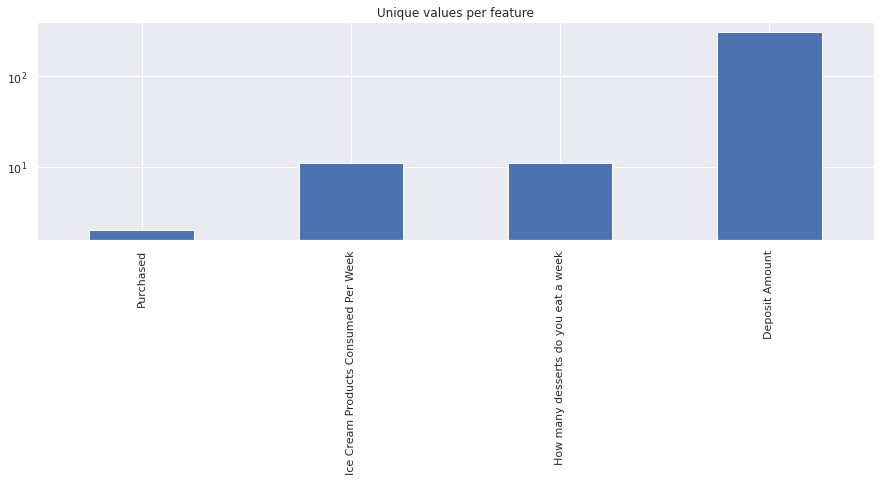

In [41]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(
  include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),
                       title="Unique values per feature");



In [48]:
df_X = df
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["Donate ID"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 831 duplicates in your database.


In [49]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_x.drop(labels=["Donate ID"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape


(9169, 12)

##Correlation Matrix

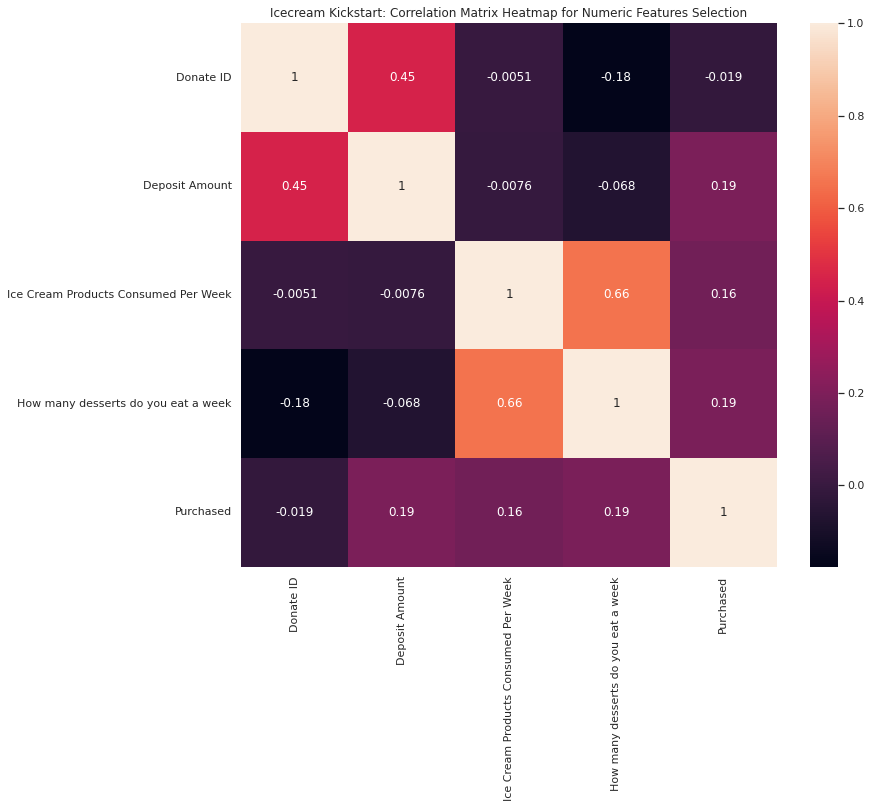

In [27]:
#@title Default title text
import seaborn as sn
import matplotlib.pyplot as plt

ax = plt.axes()
sn.heatmap(corrMatrix, annot=True, ax =ax)
ax.set_title("Icecream Kickstart: Correlation Matrix Heatmap for Numeric Features Selection")
plt.show()

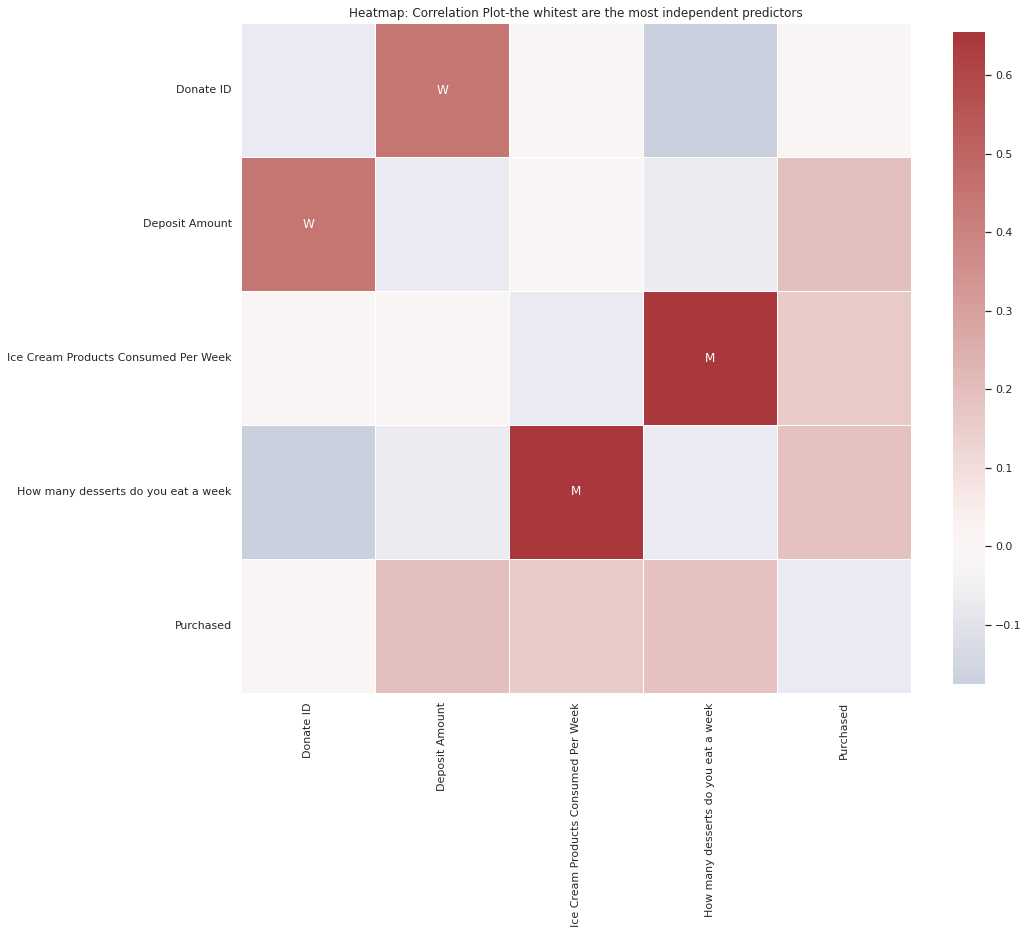

In [60]:
df_X=df

# Computes feature correlation
df_corr = df_X.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}).set(title=f"Heatmap: Correlation Plot-the whitest are the most independent predictors");

##Scatter Matrix

array([[<AxesSubplot:xlabel='Donate ID', ylabel='Donate ID'>,
        <AxesSubplot:xlabel='Deposit Amount', ylabel='Donate ID'>,
        <AxesSubplot:xlabel='Ice Cream Products Consumed Per Week', ylabel='Donate ID'>,
        <AxesSubplot:xlabel='How many desserts do you eat a week', ylabel='Donate ID'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Donate ID'>],
       [<AxesSubplot:xlabel='Donate ID', ylabel='Deposit Amount'>,
        <AxesSubplot:xlabel='Deposit Amount', ylabel='Deposit Amount'>,
        <AxesSubplot:xlabel='Ice Cream Products Consumed Per Week', ylabel='Deposit Amount'>,
        <AxesSubplot:xlabel='How many desserts do you eat a week', ylabel='Deposit Amount'>,
        <AxesSubplot:xlabel='Purchased', ylabel='Deposit Amount'>],
       [<AxesSubplot:xlabel='Donate ID', ylabel='Ice Cream Products Consumed Per Week'>,
        <AxesSubplot:xlabel='Deposit Amount', ylabel='Ice Cream Products Consumed Per Week'>,
        <AxesSubplot:xlabel='Ice Cream Products Consum

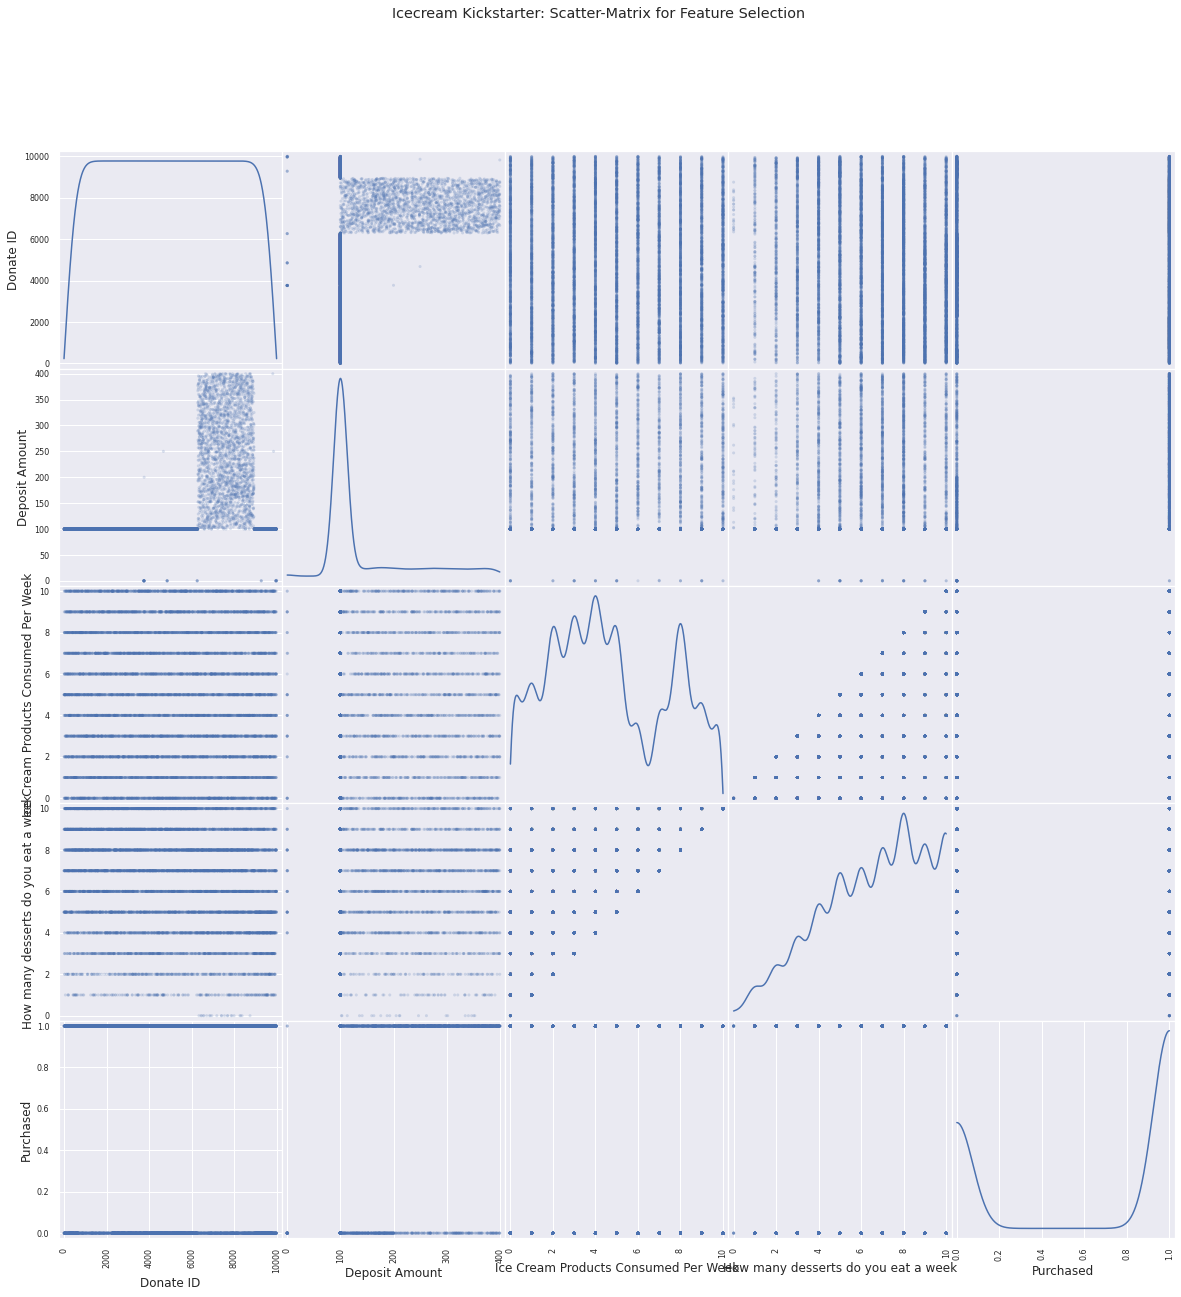

In [28]:
#scatterplot matrix
from pandas.plotting import scatter_matrix
display(pd.plotting.scatter_matrix(df, alpha=0.2,figsize = (20, 20), diagonal = 'kde'))
plt.suptitle('Icecream Kickstarter: Scatter-Matrix for Feature Selection')

plt.show()

In [29]:
import pandas as pd
import numpy as np
import math



def  computeCI(stats):
  ci95_hi = []
  ci95_lo = []
  CI = []

  for i in stats.index:
      m, c, s = stats.loc[i]
      ci95_hi.append(m + 1.96*s/math.sqrt(c))
      ci95_lo.append(m - 1.96*s/math.sqrt(c))
      #CI.append(ci95_hi[i]-ci95_lo[i])

  stats['ci95_hi'] = ci95_hi
  stats['ci95_lo'] = ci95_lo
  #stats['CI'] = ci95_hi - ci95_lo
  display(stats)

  

##Data Cleaning && Data Variable Conversion

In [107]:
#df = df.loc[~(df['Gender'].isna())]
df['Donate ID'] = df['Donate ID'].astype('string')
#df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
#df['Dadf'] = df['Dadf'].astype('string')
#df['Show'] = df['Show'].astype('string')
df2 = pd.get_dummies(df, columns=['Gender'], drop_first=False, dummy_na=False)
#df = pd.get_dummies(df, columns=['Gender_female'], drop_first=False, dummy_na=False)
#convert "donate kickstarter before""
df3 = pd.get_dummies(df2, columns=['Donated To Kick Starter Before'], drop_first=True,dummy_na=False)
#convert preferred color
df4 = pd.get_dummies(df3, columns=['Preferred Color of Device'], drop_first=True,dummy_na=False)
df5 = pd.get_dummies(df4, columns=['Do you own a Keurig'], drop_first=True,dummy_na=False)


##Helper Function and Lirary Needed

In [31]:
#sklearn will be used in later modelling
import pandas as pd
from zipfile import ZipFile
import io
import math
import seaborn as sns
#imports
!pip3 install scikit-learn
!pip3 install lightgbm
!pip3 install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import pickle
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy.stats import ttest_rel
from numpy import sqrt, abs, round
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest as ztest
# machine learning
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import lightgbm
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [32]:

def histogram(df, feature):
    """
    Generates histogram plot on a feature of dataframe
    :param df: dataframe of loaded data
    :param feature: name of the feature
    """
    x_label = feature.capitalize()
    ax = sns.histplot(data=df, x=feature)
    plt.xlabel(f"{x_label}", size=14)
    plt.ylabel("Count", size=14)
    plt.title(f"Histogram: {x_label} Distribution", size=18)
    plt.savefig(f"{feature}_hist.png") #save image
    return plt

def barplot(df, x='', hue='',title=''):
    """
    Generates barplot plot on a features of dataframe
    :param df: dataframe of loaded data
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    ax = sns.countplot(x = x, hue= hue, data = df)
    x_label = x.capitalize()
    hue_label = hue.capitalize()
    xticklabels = list(df[x].unique())
    xticklabels = [str(i).upper() for i in xticklabels]
    ax.set_xticklabels(xticklabels)
    plt.xlabel(f"{x_label}", size=14)
    plt.ylabel(f"{hue_label} Count", size=14)
    plt.title(title)
    #plt.title(f"Bank Barplot: {hue_label} vs {x_label}", size=18)
    plt.savefig(f"{x_label}_barplot.png") #save image
    # add annotations
    for c in ax.containers:
      labels = [f'{v.get_height()/df[x].count()*100:0.1f}%' if (v.get_height()) > 0 else '' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')

    return plt

# function for countplot
def countplot(x, hue, **kwargs):
    """
    Generates countplot plot on a features
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    ax = sns.countplot(x=x, hue=hue,**kwargs)
    for c in ax.containers:
      labels = [f'{v.get_height()/df[x].count()*100:0.1f}%' if (v.get_height()) > 0 else '' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')
    plt.savefig(f"countplot_{x_label}.png") #save image

def grid_barplot(df='', row='', x='', hue=''):
    """
    Generates grid barplot plot on a features of dataframe
    :param df: dataframe of loaded data
    :param row: name of the feature for horizontal axis
    :param x: name of the interested feature
    :param hue: name of the target feature
    """
    # Find out how many people have insurance considering poverty, region, country
    g = sns.FacetGrid(data=df, row=row, height=2, aspect=2.5, sharex=False, sharey=False)
    g.map_dataframe(countplot, x=x, hue=hue, alpha=.6,
                    palette=sns.color_palette("tab10"))

    g.fig.suptitle('Health Insurance Enrollment')
    g.fig.subplots_adjust(top=0.9, left=0.1)
    g.set_xlabels(f'{row.capitalize()}')
    g.set_ylabels('Count')
    g.add_legend()
    return plt

def plot_feature_importance(X, Y):
    """
    Generates a plot of feature importance percentage
    :param X: independant features
    :param Y: dependant features
    """
    model = xgb.XGBClassifier()
    model.fit(X, Y)
    importance = model.feature_importances_
    feature_importance = np.array(importance)
    feature_names = np.array(X.columns)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('XGBoost Feature Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return plt

def get_test_plots(df, sample1, sample2):
    """
    Generates box and violine plots between two features of a dataframe
    :param df: dataframe of loaded data
    :param sample1: name of feature1
    :param sample2: name of feature2
    """
    sns.boxplot(x=sample1, y=sample2, data=df)
    plt.xlabel(f"{sample1.capitalize()}", size=14)
    plt.ylabel(f"{sample2.capitalize()}", size=14)
    plt.title(f"Boxplot: {sample1.capitalize()} vs {sample2.capitalize()} Comparison", size=20)
    plt.show()
    sns.violinplot(x=sample1, y=sample2, data=df)
    plt.xlabel(f"{sample1.capitalize()}", size=14)
    plt.ylabel(f"{sample2.capitalize()}", size=14)
    plt.title(f"Violinplot: {sample1.capitalize()} vs {sample2.capitalize()} Comparison", size=20)
    plt.show()
def  computeCI(stats):
  
    ci95_hi = []
    ci95_lo = []
    CI = []
    for i in stats.index:
        m, c, s = stats.loc[i]
        ci95_hi.append(float(m + 1.96*s/math.sqrt(c)))
        ci95_lo.append(float(m - 1.96*s/math.sqrt(c)))
        #CI.append(ci95_hi[i]-ci95_lo[i])

    stats['ci95_hi'] = pd.DataFrame(ci95_hi)
    stats['ci95_lo'] = pd.DataFrame(ci95_lo)
    #stats['CI'] = ci95_hi - ci95_lo
    display(stats.head(3)) #only display 3 results

    return stats


##Count Plot

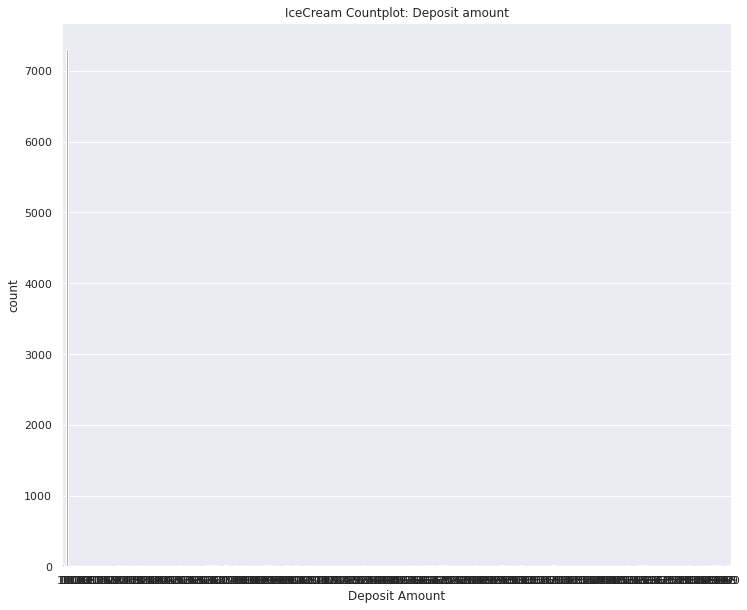

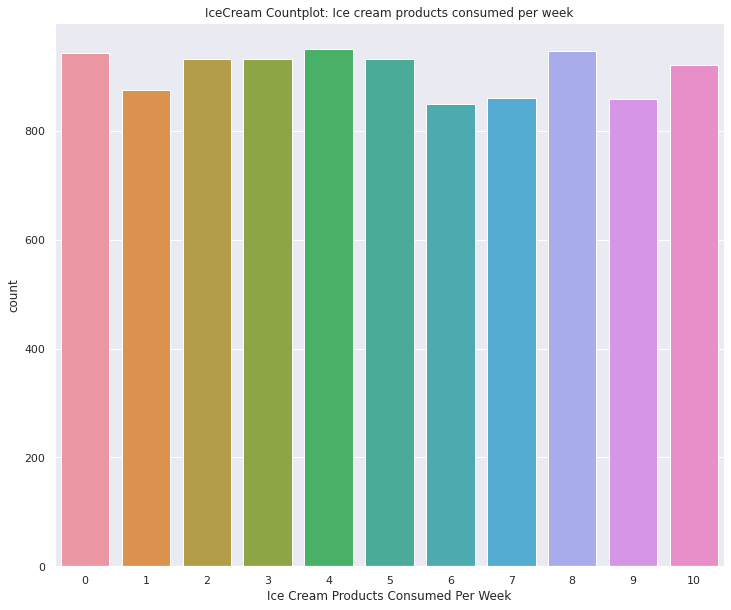

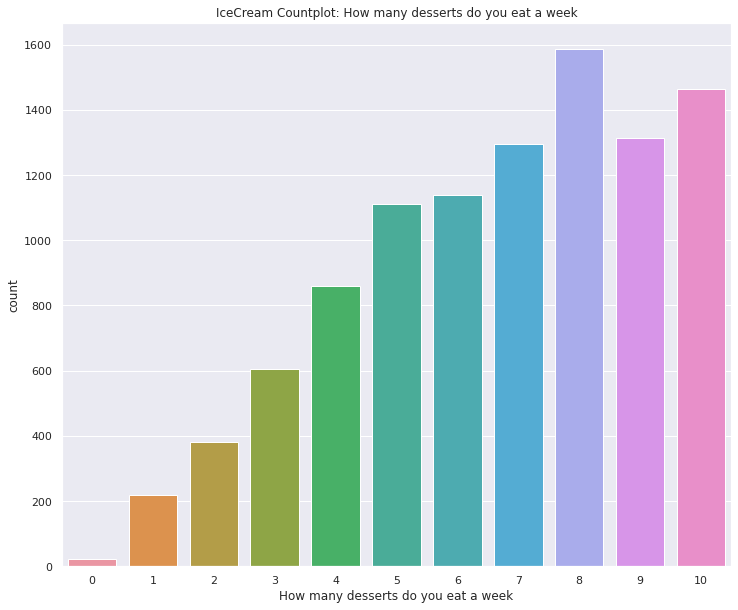

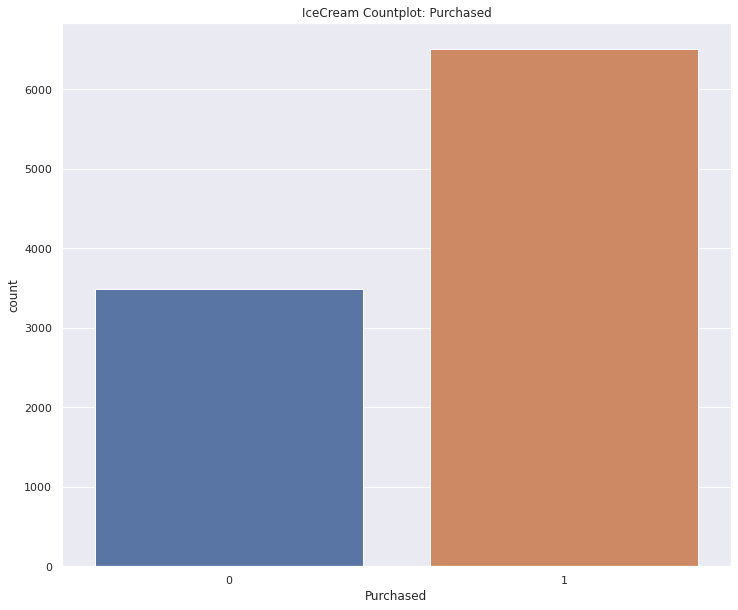

In [33]:
##Count Plot
df1 = df.select_dtypes([np.int, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col,data=df1).set(title=f"IceCream Countplot: {col.capitalize()}")

##BarPlot

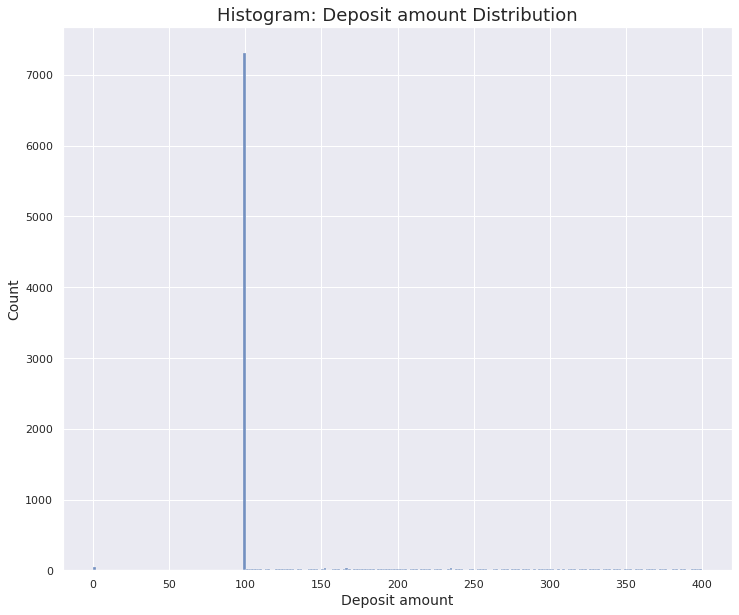

In [34]:
plt = histogram(df, 'Deposit Amount')

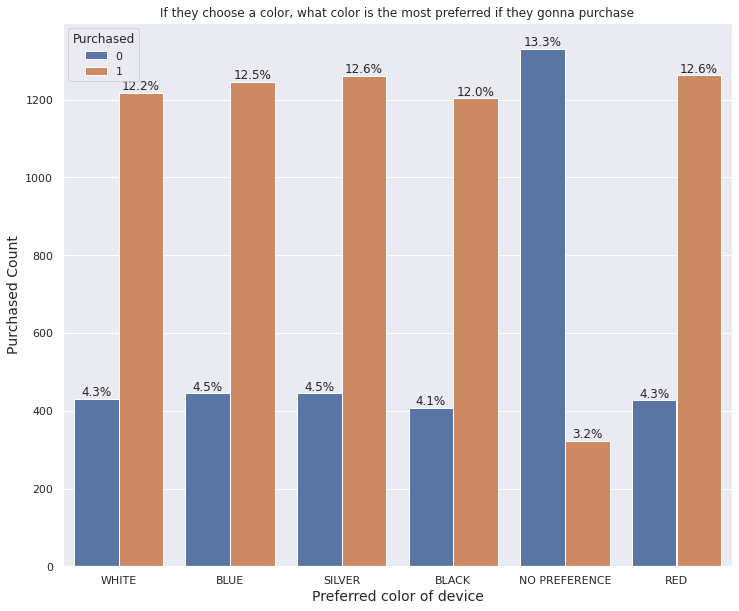

In [112]:
plt = barplot(df, x='Preferred Color of Device', hue='Purchased',title='If they choose a color, what color is the most preferred if they gonna purchase') 

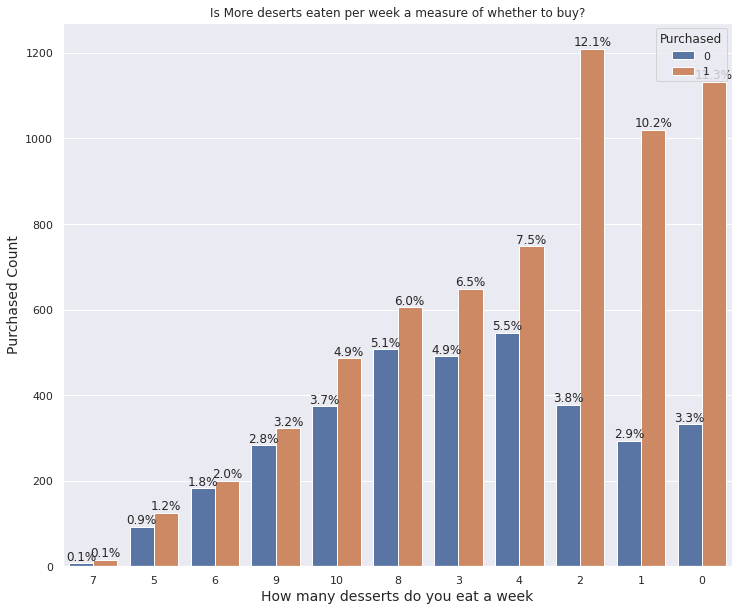

In [114]:
plt = barplot(df, x='How many desserts do you eat a week', hue='Purchased',title='Is More deserts eaten per week a measure of whether to buy?') 

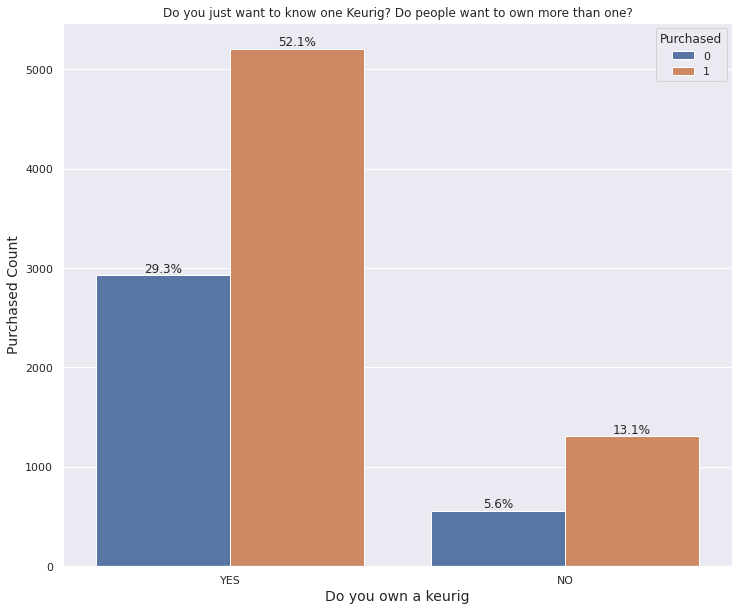

In [116]:
plt = barplot(df, x='Do you own a Keurig', hue='Purchased',title='Do you just want to know one Keurig? Do people want to own more than one?') 

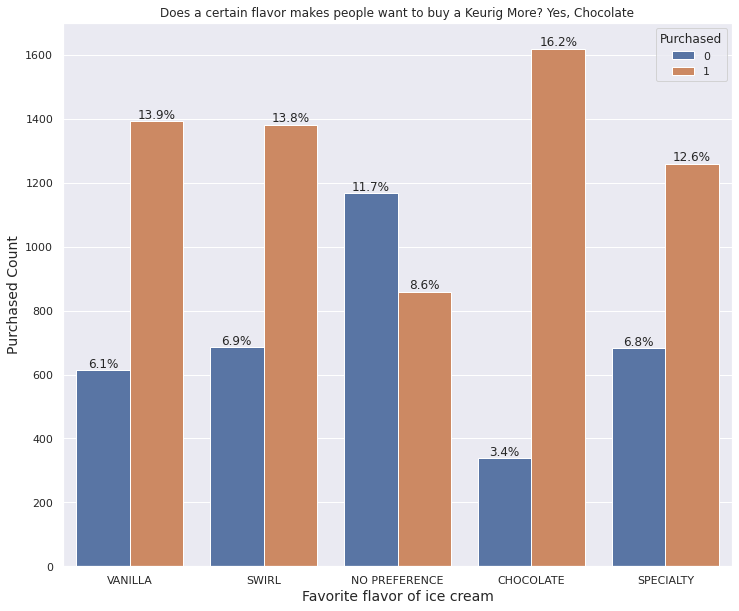

In [120]:
plt = barplot(df, x='Favorite Flavor Of Ice Cream', hue='Purchased',title='Does a certain flavor makes people want to buy a Keurig More? Yes, Chocolate') 

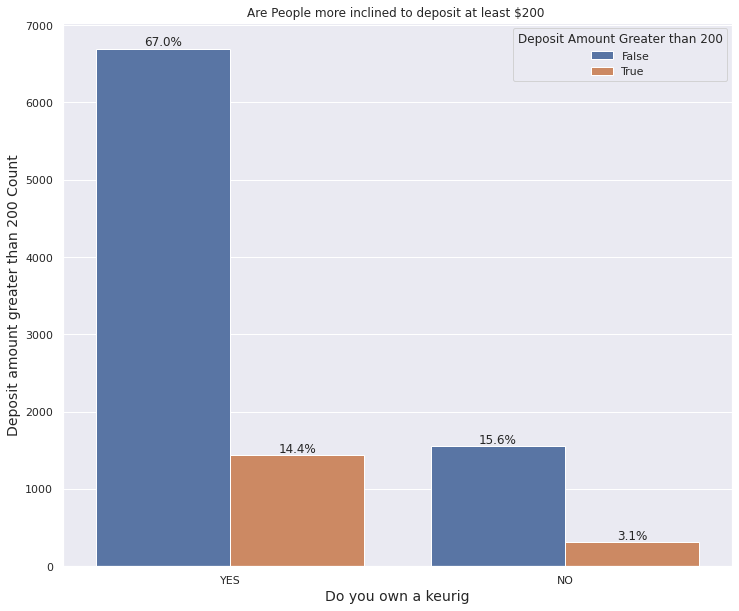

In [136]:
df2=df
df2.loc[:,'Deposit Amount']>200
df2.loc[:,'Deposit Amount Greater than 200'] = (df2.loc[:,'Deposit Amount']>200)
plt = barplot(df2, x='Do you own a Keurig', hue='Deposit Amount Greater than 200',title='Are People more inclined to deposit at least $200 ') 

##Modelling

In [110]:
from sklearn.model_selection import train_test_split


#Split
#x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.20)
x = df5[[ 'Ice Cream Products Consumed Per Week', 'How many desserts do you eat a week', 'Gender_male','Gender_female','Donated To Kick Starter Before_yes','Preferred Color of Device_blue','Preferred Color of Device_red','Preferred Color of Device_silver','Preferred Color of Device_white']]
Y = df5[['Purchased']]

x_train, x_test, z_train, z_test = train_test_split(x, Y, test_size=0.20) #80,20

In [109]:
import statsmodels.api as sm

Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2)

logr_fit = logr_model.fit()
print(logr_fit.summary())


Optimization terminated successfully.
         Current function value: 0.585968
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7991
Method:                           MLE   Df Model:                            8
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:                 0.09485
Time:                        09:14:05   Log-Likelihood:                -4687.7
converged:                       True   LL-Null:                       -5179.0
Covariance Type:            nonrobust   LLR p-value:                9.296e-207
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.0103        n

##Confusion Matrix

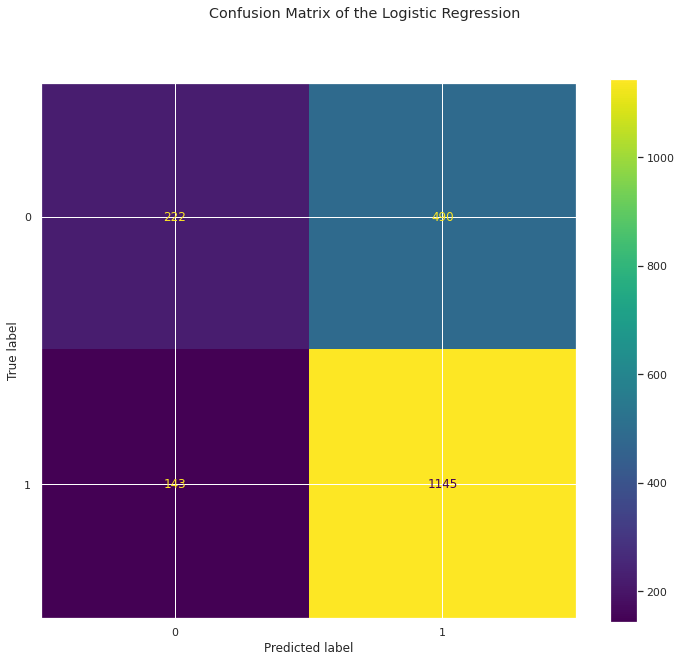

9393.486513687269


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

data = pd.get_dummies(df)  # convert categorical to one-hone encoding

logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_train,z_train)

#view results
model.fit(x_train, z_train)
plot_confusion_matrix(logistic_regression, x_test, z_test)  
plt.suptitle("Confusion Matrix of the Logistic Regression")
plt.show()

#a lot of false neg

print(logr_fit.aic)

#FP=490,TP=1145,FN=222,TN=143, don't want to underestimate the purchasing(FN), therefore decrease FN would increase supply accuracy
#inventory management
#if we want to stock enough for purchasing, then FN would be the problem, however if we don't want to overestimate our profit, then FP
#we have way more FP, therefore we would overestimate 
#490/2000 = 22% of the customers we think would purchase end up not purchasing, that's our expectation, this means that we overestimate the purchasing intent.
#also meaning an expected loss of 22% profit or total revenue for our business with this model, and means that we overshelf 22% of the kuerig, so more inventory cost 
#even though inventory cost is not really related to units stacked



##AIC, BIC (BIC is not as useful but frequently presented in researches) and ROC

In [103]:
print(model.score(x_train,z_train))

print(logr_fit.aic)
print(logr_fit.bic)

0.683625
9393.486513687269
9456.371285073226


##MSE Errors Computed for the Regression Plot

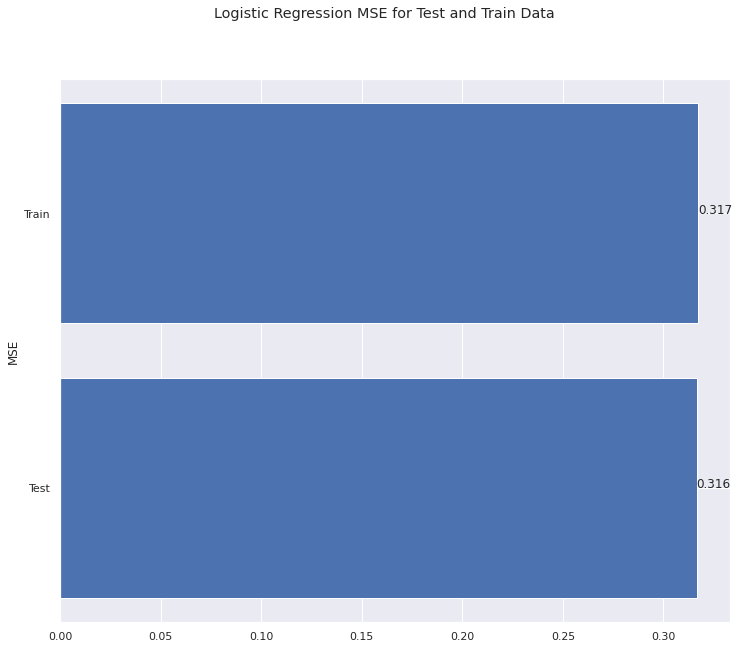

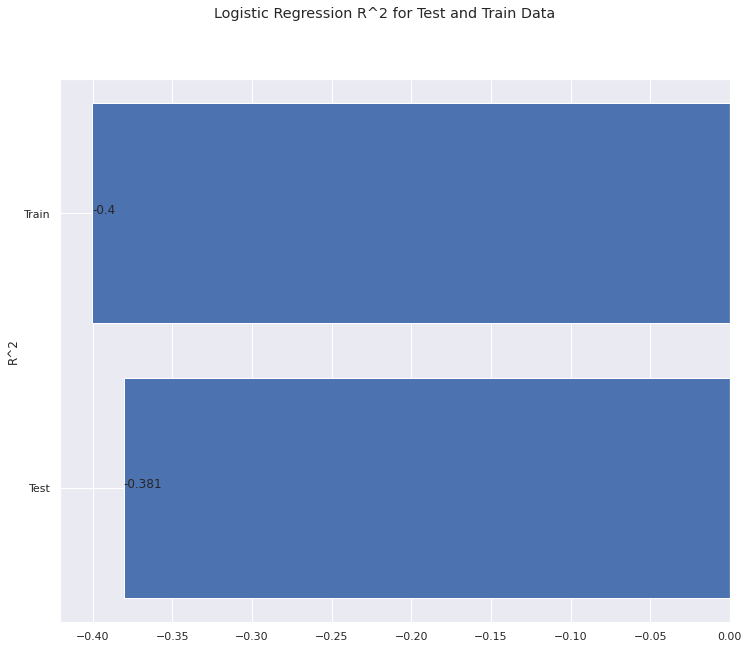

In [137]:
from sklearn.metrics import mean_squared_error, r2_score

test_y=z_test
train_y=z_train
test_x=x_test
train_x=x_train


err = []  # calculate MSE error
err.append(mean_squared_error(test_y, model.predict(test_x)))  # test MSE
err.append(mean_squared_error(train_y, model.predict(train_x)))  # train MSE
plt.barh(['Test', 'Train'], err)
for i, v in enumerate(err):
    plt.text(v, i, str(np.round(v, 3)))
plt.ylabel("MSE")
plt.suptitle("Logistic Regression MSE for Test and Train Data")
plt.show()

err = []  # calculate R^2 error
err.append(r2_score(test_y, model.predict(test_x)))  # test MSE
err.append(r2_score(train_y, model.predict(train_x)))  # train MSE
plt.barh(['Test', 'Train'], err)
for i, v in enumerate(err):
    plt.text(v, i, str(np.round(v, 3)))
plt.ylabel("R^2")
plt.suptitle("Logistic Regression R^2 for Test and Train Data")
plt.show()

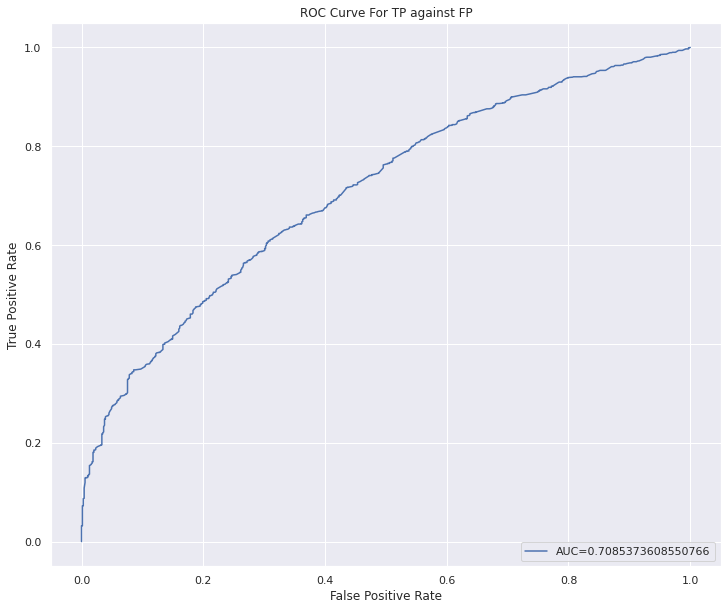

In [104]:

from sklearn import metrics
#define metrics
X_test=test_x
y_test=test_z
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
#plt.plot(fpr,tpr)
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.title("ROC Curve For TP against FP")
#plt.show()
#bad classification wtf

#define metrics
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve For TP against FP")
plt.legend(loc=4)
plt.show()


##Odds Ratio

In [97]:
#source:https://www.pythonfordatascience.org/logistic-regression-python/
model_odds = pd.DataFrame(np.exp(logr_fit.params), columns= ['OR'])
model_odds['z-value']= logr_fit.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(logr_fit.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
const,0.364125,NaN,NaN,NaN
Ice Cream Products Consumed Per Week,1.046964,1.327379e-05,1.025563,1.068811
How many desserts do you eat a week,1.144316,3.841873e-24,1.114871,1.174538
Gender_male,0.528585,NaN,NaN,NaN
Gender_female,0.688867,NaN,NaN,NaN
Donated To Kick Starter Before_yes,1.396189,2.448199e-10,1.259118,1.548181
Preferred Color of Device_blue,3.381340,2.458374e-59,2.919112,3.916761
Preferred Color of Device_red,3.812802,3.354114e-69,3.284366,4.426261
Preferred Color of Device_silver,3.814974,1.103008e-68,3.284136,4.431615
Preferred Color of Device_white,3.373838,1.967160e-58,2.910021,3.911581


##Try a Gamma Model

In [99]:
gamma_model = sm.GLM(z_train, Xlog2, family=sm.families.Gamma()) 
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7991
Model Family:                   Gamma   Df Model:                            8
Link Function:          inverse_power   Scale:                         0.65143
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Sun, 24 Apr 2022   Deviance:                   1.9765e+05
Time:                        08:30:23   Pearson chi2:                 5.21e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [100]:
print(gamma_results.aic)
print(gamma_results.bic)

-inf
125831.56327359153
